--------------------- 
#### Activation functions
------------------------

- Activation functions are mathematical functions applied to the output of neurons in artificial neural networks. 

- They introduce `non-linearity` to the network, enabling it to learn complex patterns and relationships in the data.

- they are used `within` the network and/or at the `output` of model

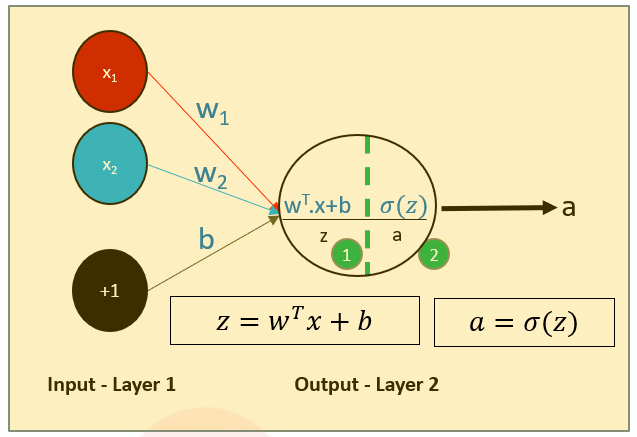

#### Heaviside step function

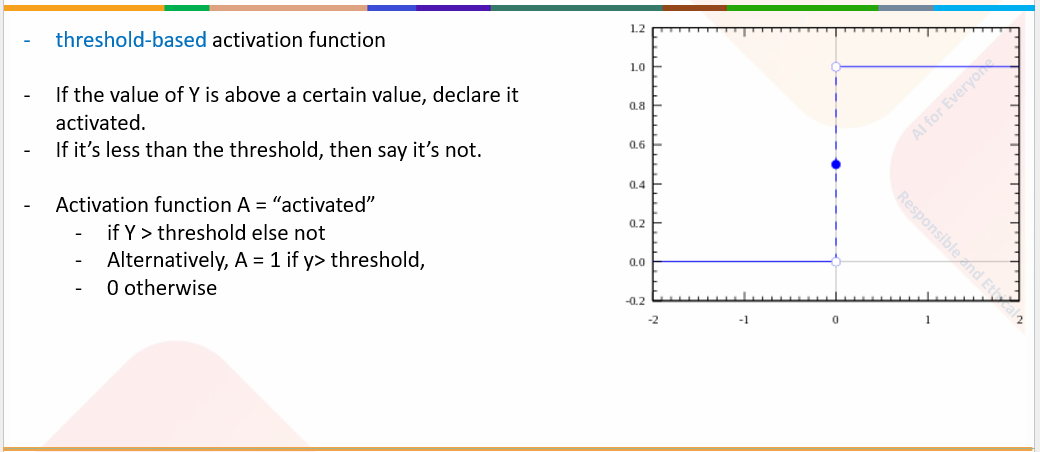

The `Heaviside step function`, also known as the `unit step` function or the `step function`, is a mathematical function denoted as $H(x)$. 

It has various representations, but the most common one is:

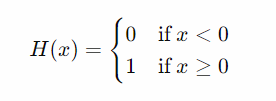

In other words, 
- the Heaviside step function outputs 
    - 0 for negative inputs and 
    - 1 for non-negative inputs. 
    
It's a simple yet fundamental function with several uses and benefits:

**Uses**

- `Indicator Function`: It serves as an indicator function that "turns on" when a certain condition is met (i.e., when X ≥ 0) and remains "off" otherwise. This property makes it useful for defining `piecewise` functions or `constraints` in mathematical expressions.

- `Signals and Control Systems`: In engineering and control theory, the step function is used to model abrupt changes or transitions in signals or systems. It represents an instantaneous change from one state to another, making it valuable for analyzing and designing control systems.

- `Impulse Response`: In signal processing, the step function is related to the impulse response of a system. Convolution with the step function can be used to extract or analyze specific components of signals or systems.

- `Modeling Thresholds`: It's `commonly used in machine learning and neural networks` to introduce non-linearity and model thresholding behavior. For example, in binary classification tasks, the step function can be used as an activation function to determine whether the output of a neuron should be 0 or 1 based on a certain threshold.

**Limitations**



- `Non-Differentiability`: The Heaviside step function is not differentiable at x=0. This poses challenges for optimization algorithms that rely on derivatives, such as gradient descent, as they cannot be applied directly to functions containing the step function.

- `Discontinuity`: The function has a jump discontinuity at x=0. While this property is useful for defining `piecewise` functions or indicating threshold behavior, it can complicate mathematical operations involving integration, differentiation, or convolution.

- `Imprecise Modeling`: The step function represents an abrupt transition from one value to another at a specific threshold. However, real-world phenomena often exhibit more gradual or nuanced changes, making the step function overly simplistic for modeling complex systems.

- `Limited Application`: The step function is primarily useful for binary decision-making or indicating the presence or absence of a condition. It may not be suitable for tasks requiring smooth transitions or continuous representations of data.

----------------------------------
#### Sigmoid function
--------------------------------

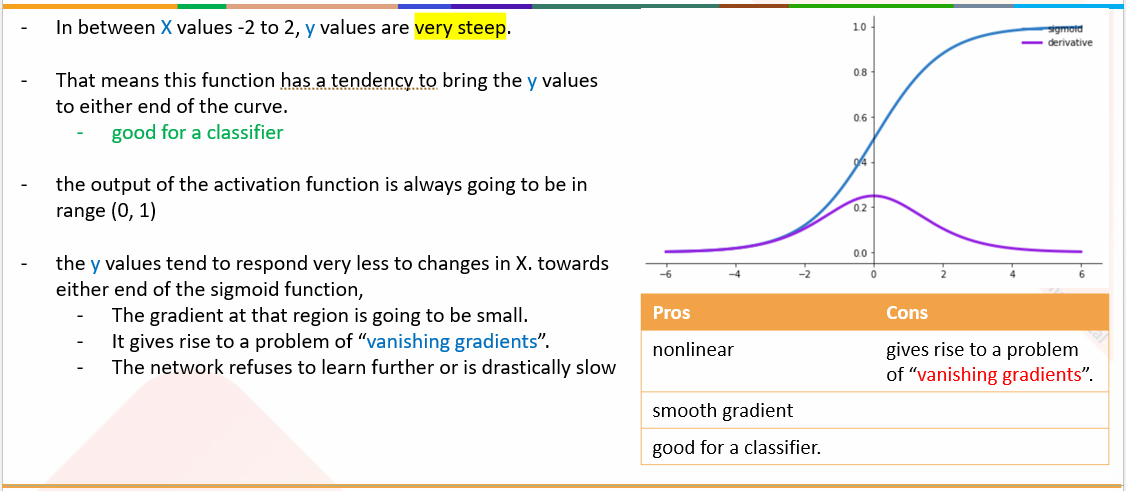

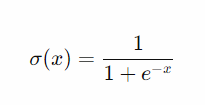

where e is Euler's number (approximately 2.71828) and x is the input. 

The sigmoid function has an S-shaped curve and is characterized by its ability to "squash" input values to the range between 0 and 1. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
# Generate input values
x = np.linspace(-10, 10, 100)

In [4]:
# Compute sigmoid values
y = sigmoid(x)

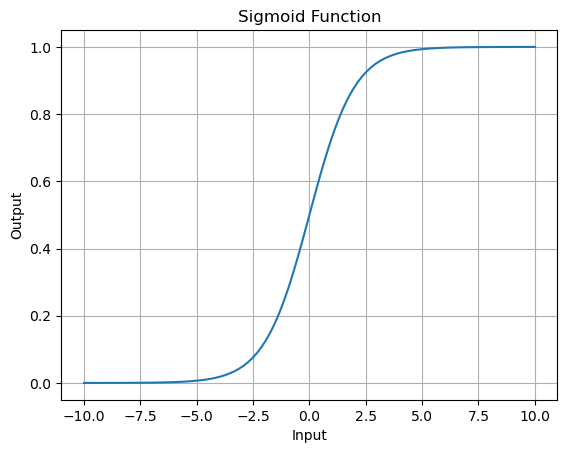

In [5]:
# Plot the sigmoid function
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

**Uses**

`Binary Classification`: In binary classification tasks, the sigmoid function is commonly used as the activation function in the output layer. It maps the network's raw output to a probability score between 0 and 1, indicating the likelihood of the input belonging to the positive class.

`Logistic Regression`: Sigmoid functions are the core of logistic regression models. They model the probability that an input belongs to a certain class, making them suitable for binary classification tasks.

`Neural Networks`: Historically, the sigmoid function was widely used as an activation function in neural networks. It introduced non-linearity to the network, allowing it to learn complex patterns. `However, it has been largely replaced by other activation functions like ReLU due to certain limitations`.

**Limitations**

- `Vanishing Gradient`: The gradient of the sigmoid function becomes very small for large positive or negative inputs, leading to the vanishing gradient problem. This can slow down or hinder the training of deep neural networks.

- `Sigmoid Saturation`: Sigmoid functions saturate and flatten out for large positive or negative inputs, causing them to lose discriminative power in those regions.

- `Output Biases`: Sigmoid functions tend to output values close to 0.5 for inputs around 0, which can lead to vanishing gradients and slow learning in the early stages of training.


**Vanishing gradient** - issue

In [6]:
# Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
# Define the network architecture
input_size  = 2
hidden_size = 3
output_size = 1

In [8]:
# Randomly initialize weights and biases
np.random.seed(42)

W1 = np.random.randn(input_size, hidden_size)  # Weights of input to hidden layer
b1 = np.random.randn(hidden_size)              # Bias of hidden layer
W2 = np.random.randn(hidden_size, output_size) # Weights of hidden to output layer
b2 = np.random.randn(output_size)              # Bias of output layer

In [10]:
# Forward pass: Compute output
X  = np.array([[0.5, 0.2]])  # Input data

z1 = np.dot(X, W1) + b1      # Linear transformation of input by the hidden layer
a1 = sigmoid(z1)             # Activation of hidden layer

z2 = np.dot(a1, W2) + b2     # Linear transformation of hidden layer by the output layer

output = sigmoid(z2)         # Output of the network

In [11]:
# Compute gradients using backpropagation
# Derivative of the loss function with respect to the output layer
loss_derivative = 2 * (output - 0.8) * sigmoid_derivative(z2)  

In [12]:
# Gradient of the loss with respect to the weights and biases of the output layer
grad_W2 = np.dot(a1.T, loss_derivative)  
grad_b2 = loss_derivative  

In [13]:
# Derivative of the loss function with respect to the hidden layer
loss_derivative_hidden = np.dot(loss_derivative, W2.T) * sigmoid_derivative(z1)  

In [14]:
# Gradient of the loss with respect to the weights and biases of the hidden layer
grad_W1 = np.dot(X.T, loss_derivative_hidden)  
grad_b1 = loss_derivative_hidden  

In [15]:
# Print gradients
print("Gradient of W1:")
print(grad_W1)
print("Gradient of b1:")
print(grad_b1)
print("Gradient of W2:")
print(grad_W2)
print("Gradient of b2:")
print(grad_b2)

Gradient of W1:
[[-0.00314271  0.0063798   0.00705084]
 [-0.00125709  0.00255192  0.00282034]]
Gradient of b1:
[[-0.00628543  0.0127596   0.01410169]]
Gradient of W2:
[[-0.10928127]
 [-0.08035332]
 [-0.05525647]]
Gradient of b2:
[[-0.12223973]]


observe that the gradients of the `weights` and `biases` become very `small` as you move backward through the layers, particularly for large positive or negative inputs, demonstrating the vanishing gradient problem. 

This phenomenon can `hinder the training process`, especially in `deeper networks`, as the weights of the earlier layers receive very small updates during optimization.

**Sigmoid Saturation** - issue

- "Sigmoid saturation" refers to the phenomenon where the output of the sigmoid function becomes `flat` and approaches its asymptotic limits (0 or 1) for large positive or negative inputs.

- This means that the `gradient` of the sigmoid function becomes `close to zero` in these regions, resulting in a `vanishing gradient problem`. 

- As a consequence, the sigmoid function loses its `discriminative power or ability to differentiate` between inputs that fall outside the dynamic range where it can provide meaningful distinctions.

Consider the standard sigmoid function:

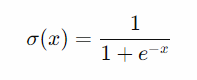

- As $x$ approaches `positive infinity`, $e^{−x}$ becomes very close to zero, and σ(x) approaches 1. 

- Similarly, as x approaches negative infinity, $e^{−x}$ becomes very large, and σ(x) approaches 0. 

- for large positive or negative inputs, the change in the output of the sigmoid function becomes negligible. 

This leads to a situation where inputs that are significantly larger or smaller than the input range where the sigmoid function provides meaningful distinctions result in similar outputs, effectively **flattening out** the function.


In [16]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
# Generate input values
x = np.linspace(-10000, 10000, 10000)

In [18]:
# Compute sigmoid values
y = sigmoid(x)

C:\Users\bhupe\AppData\Local\Temp\ipykernel_31408\3922923584.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


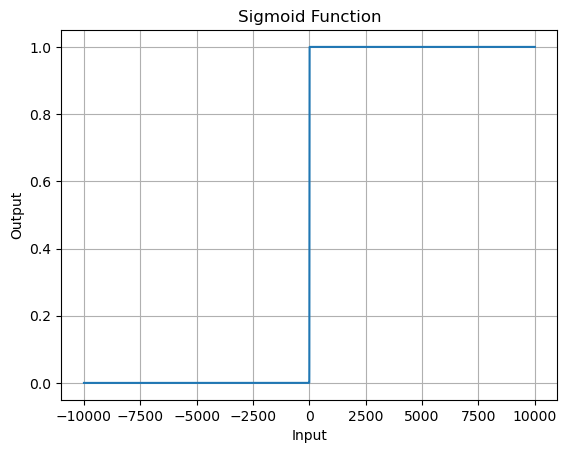

In [19]:
# Plot the sigmoid function
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

- notice that the sigmoid function rapidly approaches 0 for large negative inputs and approaches 1 for large positive inputs. 

- beyond certain input ranges, the sigmoid function's slope becomes very flat, indicating saturation. 

**"Output Biases"** 

refers to the tendency of sigmoid activation functions to produce outputs close to 0.5 when the input is around 0. 

This characteristic can have implications for training neural networks, particularly in the early stages of training.

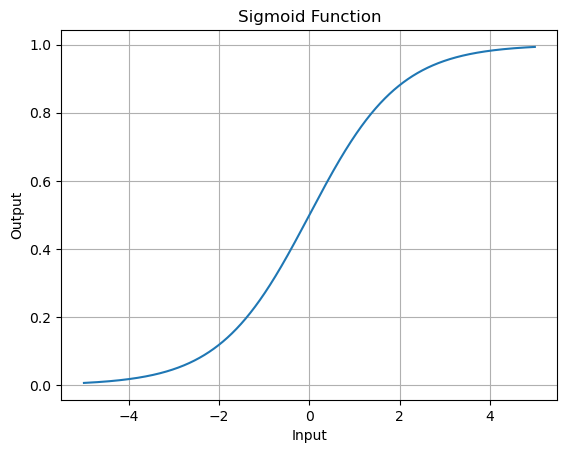

In [20]:
# Example inputs around 0
x = np.linspace(-5, 5, 10000)
y = sigmoid(x)

# Plot sigmoid function
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

observe that the output of the sigmoid function is close to 0.5 when the input is around 0.

--------------------------
#### tanh function
---------------------------------

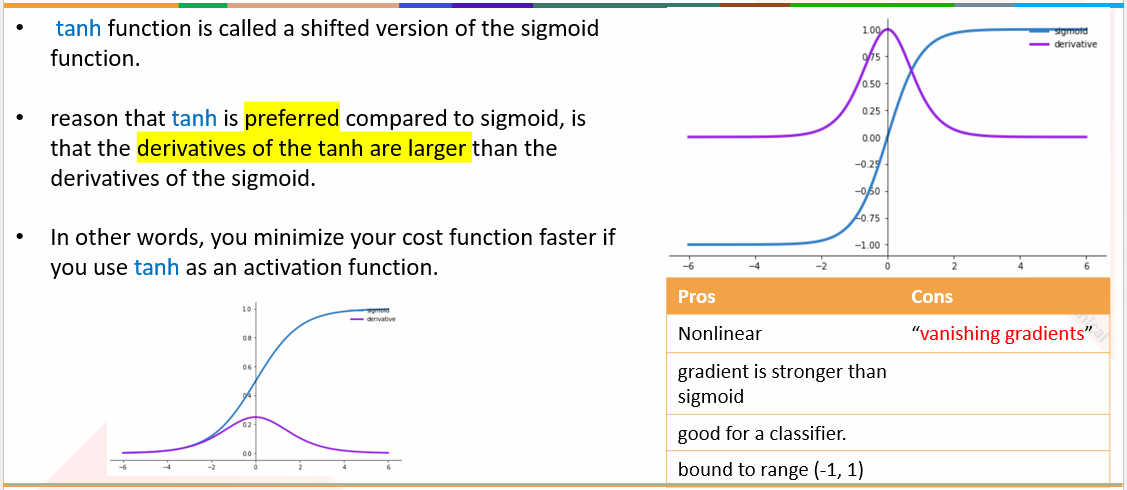

maps real-valued numbers to values in the range (−1,1).

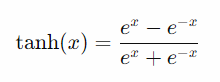

In [21]:
# Define the tanh function
def my_tanh(x):
    return np.tanh(x)

In [22]:
# Generate input values
x = np.linspace(-5, 5, 100)

In [23]:
# Compute tanh values
y = my_tanh(x)

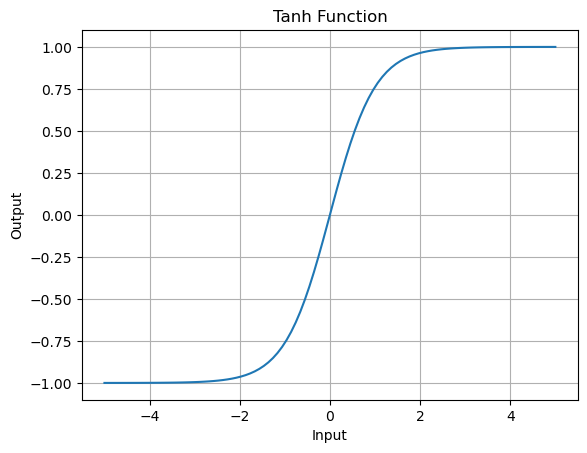

In [24]:
# Plot the tanh function
plt.plot(x, y)
plt.title('Tanh Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

`Activation Function`: Tanh functions are commonly used as activation functions in neural networks, especially in recurrent neural networks (RNNs) and long short-term memory networks (LSTMs). The symmetric nature of tanh helps the network learn more efficiently by providing stronger gradients compared to the sigmoid function, especially for inputs far from zero.

`Gating Mechanism`: In recurrent neural networks, tanh functions are often used in gating mechanisms, such as the input and forget gates in LSTMs, to regulate the flow of information and prevent the vanishing gradient problem.

**Limitations of tanh**

`Vanishing Gradient`: 
- Similar to the sigmoid function, tanh can suffer from the vanishing gradient problem. 

- For _extreme input values_, the gradient of the tanh function approaches zero, causing the gradients to vanish during backpropagation. 

- This can slow down or hinder the learning process, especially in deep neural networks with many layers.

In [25]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2  # Derivative of tanh function: 1 - tanh^2(x)

In [26]:
# Generate a range of input values
x_values = np.linspace(-10, 10, 1000)

In [27]:
# Calculate gradients for each input value
gradients = tanh_derivative(x_values)

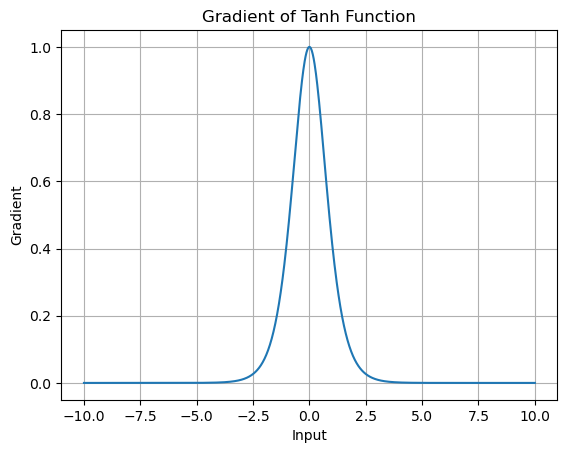

In [28]:
# Plot the gradients
import matplotlib.pyplot as plt
plt.plot(x_values, gradients)
plt.xlabel('Input')
plt.ylabel('Gradient')
plt.title('Gradient of Tanh Function')
plt.grid(True)
plt.show()

As we approach extreme values (either very large positive or very large negative), the gradients approach zero. This behavior demonstrates the `vanishing gradient` problem associated with the tanh function,

`Saturation`: 

- Tanh saturates for large positive or negative inputs, meaning that the function's output approaches its maximum or minimum value (-1 or 1) asymptotically. 

- When the neuron's output saturates, the gradients become very small, leading to slow learning or difficulty in updating the model's parameters.

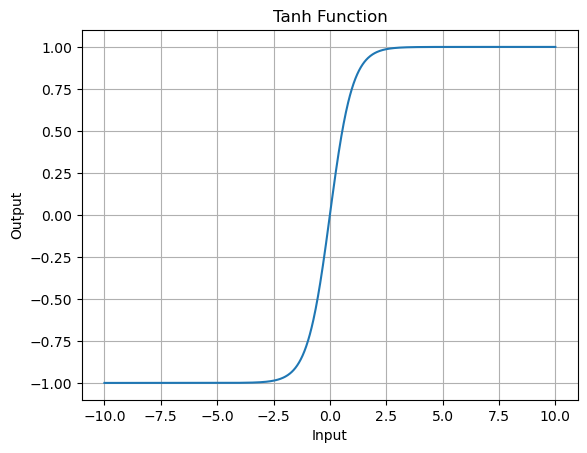

In [29]:
def tanh(x):
    return np.tanh(x)

# Generate a range of input values
x_values = np.linspace(-10, 10, 1000)

# Calculate tanh values for each input value
y_values = tanh(x_values)

# Plot the tanh function
plt.plot(x_values, y_values)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Tanh Function')
plt.grid(True)
plt.show()

This saturation phenomenon can lead to small gradients, making it challenging for the neural network to learn effectively

--------------------------
#### Relu
-------------------------------

It's defined as $f(x)=\max (0, x)$, meaning that it returns 0 for negative input values and returns the input value itself for non-negative input values. 

ReLU is widely used due to its simplicity and effectiveness in many deep learning tasks.

In [31]:
# Define ReLU function
def relu(x):
    return np.maximum(0, x)

In [32]:
# Generate input values
x = np.linspace(-5, 5, 100)

In [33]:
# Compute ReLU values
y = relu(x)


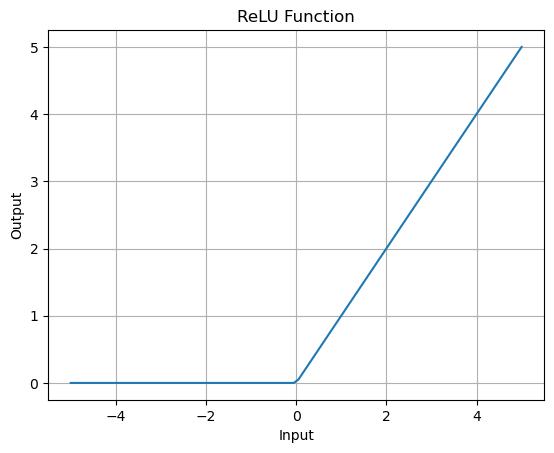

In [34]:
# Plot the ReLU function
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

**Pros of ReLU:**

- `Simplicity`: ReLU is simple to understand and compute. It involves only a single operation (max function), making it computationally efficient.

- `Sparsity`: ReLU introduces sparsity in activation patterns. Neurons with negative inputs output 0, effectively turning off some neurons. This can lead to 'more efficient learning' and better generalization.

- `Efficiency`: The derivative of ReLU is either 0 (for negative inputs) or 1 (for positive inputs), making it computationally efficient to compute during backpropagation.

- `Avoids Vanishing Gradient`: ReLU helps alleviate the vanishing gradient problem, as it doesn't saturate for positive inputs. This enables more stable and faster training, especially in deep neural networks.

**Cons of ReLU:**

- `Dead Neurons`: Neurons that output 0 `for all inputs` are considered "dead" and do not contribute to the learning process. If a large gradient causes the weights to be updated in such a way that a neuron always outputs 0, it can remain "dead" for the remainder of training.

- `Dying ReLU`: Some neurons may become "dead" during training and never recover. This phenomenon is known as "dying ReLU" and occurs when the weighted sum of inputs to a neuron is consistently negative, causing the neuron to always output 0.

- `Unbounded Output`: ReLU does not bound the output of neurons, which can lead to exploding activations. This may require additional techniques such as batch normalization or gradient clipping to mitigate.


In [35]:
# Define ReLU activation function
def relu(x):
    return np.maximum(0, x)

In [36]:
# Generate random input data
input_data = np.random.randn(20)  # 1000 samples, 10 features


In [37]:
input_data

array([-1.91328024, -1.72491783, -0.56228753, -1.01283112,  0.31424733,
       -0.90802408, -1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 ,
       -1.42474819, -0.54438272,  0.11092259, -1.15099358,  0.37569802,
       -0.60063869, -0.29169375, -0.60170661,  1.85227818, -0.01349722])

In [38]:
# Apply ReLU activation to the input data
activation_output = relu(input_data)

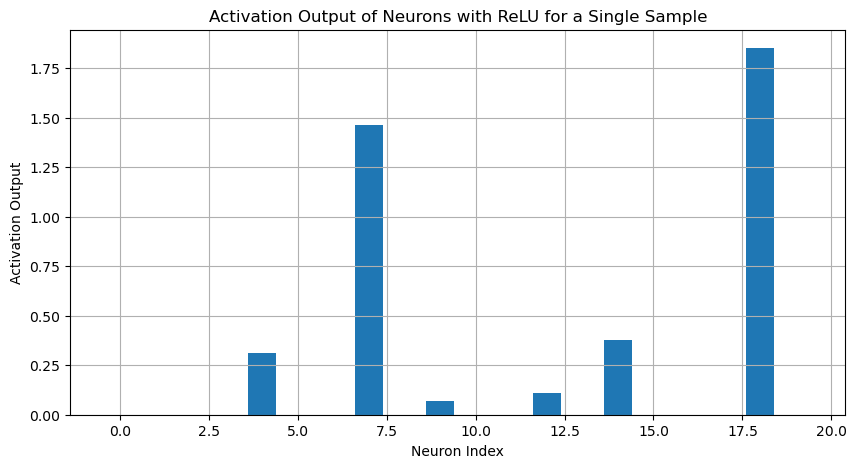

In [39]:
# Plot the activation output for each neuron
plt.figure(figsize=(10, 5))
plt.bar(range(len(activation_output)), activation_output)
plt.xlabel('Neuron Index')
plt.ylabel('Activation Output')
plt.title('Activation Output of Neurons with ReLU for a Single Sample')
plt.grid(True)
plt.show()

 ReLU introduces sparsity in the activation patterns of neurons, with some neurons having zero activations for the given input sample.

**Effect of sparisty**

`Efficient Representation`: 

- Sparsity in activation patterns means that only a subset of neurons are activated for a given input, leading to a more efficient representation of the data. 

- By activating only relevant neurons, the network can focus on important features and discard irrelevant ones, `reducing` computational and memory requirements.

`Improved Generalization`: 

- Sparsity often leads to better generalization performance. 

`Regularization Effect`: 
- The sparsity induced by activation functions like ReLU acts as a form of regularization for the network. 
- By encouraging sparsity in the activation patterns, ReLU helps prevent overfitting by reducing the network's capacity to memorize noise in the training data.


**Dead Neurons:**

- Dead neurons are specific neurons in the network that output zero for all inputs, regardless of the input values. 

- In the context of ReLU, dead neurons occur when the weighted sum of inputs to a neuron is consistently negative. 

- When this happens, the ReLU activation function will output zero, effectively "killing" the neuron. 

- Dead neurons do not contribute to the learning process because they do not propagate any information through the network.

In [40]:
# Define ReLU activation function
def relu(x):
    return np.maximum(0, x)

In [41]:
# Define a function to create a neural network with intentional dead neurons
def neural_network(input_data):
    # Define weights and biases for the first layer
    weights_1 = np.array([ [1, -1, 0,  0, 0],  # Weights for 5 neurons in the first layer
                           [0,  0, 1, -1, 0], 
                           [0,  0, 0,  0, 1]])
    
    biases_1 = np.array([0, 0, 0, 0, 0])  # Biases for the first layer
    
    # Calculate the weighted sum of inputs for the first layer
    weighted_sum_1 = np.dot(input_data, weights_1) + biases_1
    
    # Apply ReLU activation to the weighted sum
    output_1 = relu(weighted_sum_1)
    
    return output_1

In [42]:
# Generate random input data for a single sample
input_data = np.random.randn(3)  # 3 features for a single sample
input_data

array([-1.05771093,  0.82254491, -1.22084365])

In [43]:
# Apply the neural network function to the input data
output = neural_network(input_data)
output

array([0.        , 1.05771093, 0.82254491, 0.        , 0.        ])

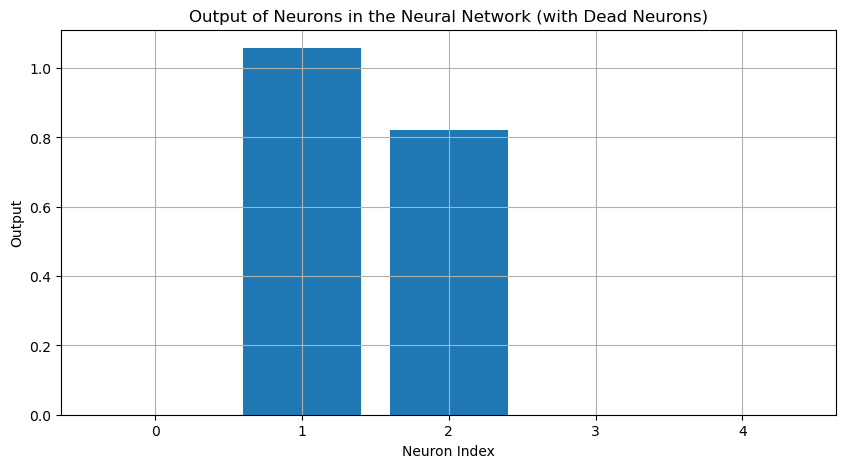

In [44]:
# Plot the output of the neurons
plt.figure(figsize=(10, 5))
plt.bar(range(len(output)), output)
plt.xlabel('Neuron Index')
plt.ylabel('Output')
plt.title('Output of Neurons in the Neural Network (with Dead Neurons)')
plt.grid(True)
plt.show()